In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

df = pd.read_csv('https://www.ishelp.info/data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# set label and features
y = df.smoker
X = df.drop(columns=['smoker'])

#generate dummy codes for non numeric features
for col in X:
    if not pd.api.types.is_numeric_dtype(df[col]):
        X = pd.get_dummies(X, columns=[col], drop_first=True)

X.head()

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,0,0,1
1,18,33.770,1,1725.55230,1,0,1,0
2,28,33.000,3,4449.46200,1,0,1,0
3,33,22.705,0,21984.47061,1,1,0,0
4,32,28.880,0,3866.85520,1,1,0,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
X_train.head()

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest
1046,43,25.080,0,7325.04820,0,0,0,0
358,23,41.910,0,1837.28190,1,0,1,0
1144,50,32.300,2,9630.39700,1,0,0,1
522,51,33.915,0,9866.30485,0,0,0,0
54,40,28.690,3,8059.67910,0,1,0,0


In [7]:
#train the decision tree model
clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

In [12]:
#make a prediction using the test set
y_pred = clf.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).sort_values(by=['Actual', 'Predicted'], ascending=[False, True]).head(5)

,Actual,Predicted
1204,yes,no
98,yes,no
250,yes,no
638,yes,yes
1047,yes,yes


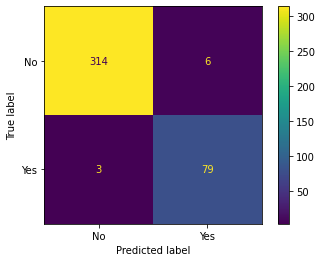

In [14]:
from matplotlib import pyplot as plt

#plot the numbers for the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

#put the CM in a heat map to make it look cool
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
cm_display.plot(values_format='d')

In [21]:
#find accuracy of model
print(f'Accuracy:\t{metrics.accuracy_score(y_test, y_pred)}')

#create a df and make dummy code out of the NOs and YESs
y_test_dummies = pd.get_dummies(y_test)
y_pred_dummies = pd.get_dummies(y_pred)

#find precision (true positives / (true positives + false positives))
print(f'Precision:\t{metrics.precision_score(y_test_dummies.yes, y_pred_dummies.yes)}')

#find recall (true positives / (true positives + false negatives))
print(f'Recall:\t\t{metrics.recall_score(y_test_dummies.yes, y_pred_dummies.yes)}')

#find f1 (2 * (precision * recall))) / (precison + recall)))
print(f'f1:\t\t{metrics.f1_score(y_test_dummies.yes, y_pred_dummies.yes)}')

Accuracy:	0.9776119402985075
Precision:	0.9294117647058824
Recall:		0.9634146341463414
f1:		0.9461077844311377


In [26]:
#visualize the tree

from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus, six
from sklearn.externals.six import StringIO

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = X.columns,class_names=['no', 'yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('smoker.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found